In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore



**Part 1.1 a - Read ‘Car name.csv’ as a DataFrame and assign it to a variable**

In [109]:
data1 = pd.read_csv("/workspaces/GreatLearning/Unsupervised/Project/Car name.csv")

In [110]:
data1.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [111]:
data1.shape

(398, 1)

**Part 1.1 b - Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.**

In [112]:
data2 = pd.read_json("/workspaces/GreatLearning/Unsupervised/Project/Car-Attributes.json")

In [113]:
data2.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [114]:
data2.shape

(398, 8)

**Part 1.1 c - Merge both the DataFrames together to form a single DataFrame**

In [115]:
data = pd.merge(data1, data2, left_index=True, right_index=True)


In [116]:
data.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [117]:
data.shape

(398, 9)

**Part 1.1 d - Print 5 point summary of the numerical features and share insights.**

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [119]:
data.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


**Insights from 5 points summary**

Totally we have 7 numerical columns , lets see one by one

**1.mpg**

total records = 398,

min value = 9,

mean value = 23,

sd value = 7.8,

max value = 46.6,

25 th percentile = 17.5,

50 th percentile = 23,

75 th percentile = 29

**2.cyl**

total records = 398,

min value = 3,

mean value = 5.4,

sd value = 1.7,

max value = 8,

25 th percentile = 4,

50 th percentile = 4,

75 th percentile = 8

**3.disp**

total records = 398,

min value = 68,

mean value = 193,

sd value = 104,

max value = 455,

25 th percentile = 104,

50 th percentile = 148,

75 th percentile = 262
 
**4.wt**

total records = 398,

min value = 1613,

mean value = 2970,

sd value = 846,

max value = 5140,

25 th percentile = 2223,

50 th percentile = 2803,

75 th percentile = 3608

**5.acc**

total records = 398,

min value = 8,

mean value = 15,

sd value = 2,

max value = 24,

25 th percentile = 13,

50 th percentile = 15,

75 th percentile = 17

**6.yr**

total records = 398,

min value = 70,

mean value = 76,

sd value = 3,

max value = 82,

25 th percentile = 73,

50 th percentile = 76,

75 th percentile = 79


**7.origin**

total records = 398,

min value = 1,

mean value = 1.5,

sd value = 0.8,

max value = 3,

25 th percentile = 1,

50 th percentile = 1,

75 th percentile = 2

**Part 1.2 a - Check and print feature-wise percentage of
missing values present in the data and impute with the
best suitable approach.**

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [121]:
data.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

**There is not null values but we can check for any mistaken/wrong values which can be replaced/imputed**

**Column with wrong data types(compared with data description)**
1. hp - object here - need to be changes to float



In [122]:
data["hp"].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [123]:
data["hp"] = data["hp"].replace("?", pd.NaT)

In [124]:
data["hp"] = pd.to_numeric(data["hp"], errors='coerce')

In [125]:
data["hp"].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [126]:
print("NULL %")
data.isnull().sum()/len(data)

NULL %


car_name    0.000000
mpg         0.000000
cyl         0.000000
disp        0.000000
hp          0.015075
wt          0.000000
acc         0.000000
yr          0.000000
origin      0.000000
dtype: float64

In [127]:
data["hp"].fillna(data["hp"].mean(), inplace=True)

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    float64
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


**Part 1.2 b - Check for duplicate values in the data and
impute with the best suitable approach.**

In [129]:
data.duplicated().sum()

0

**I don't see any duplicate records in data**

**Part 1.2 c - Plot a pairplot for all features.**

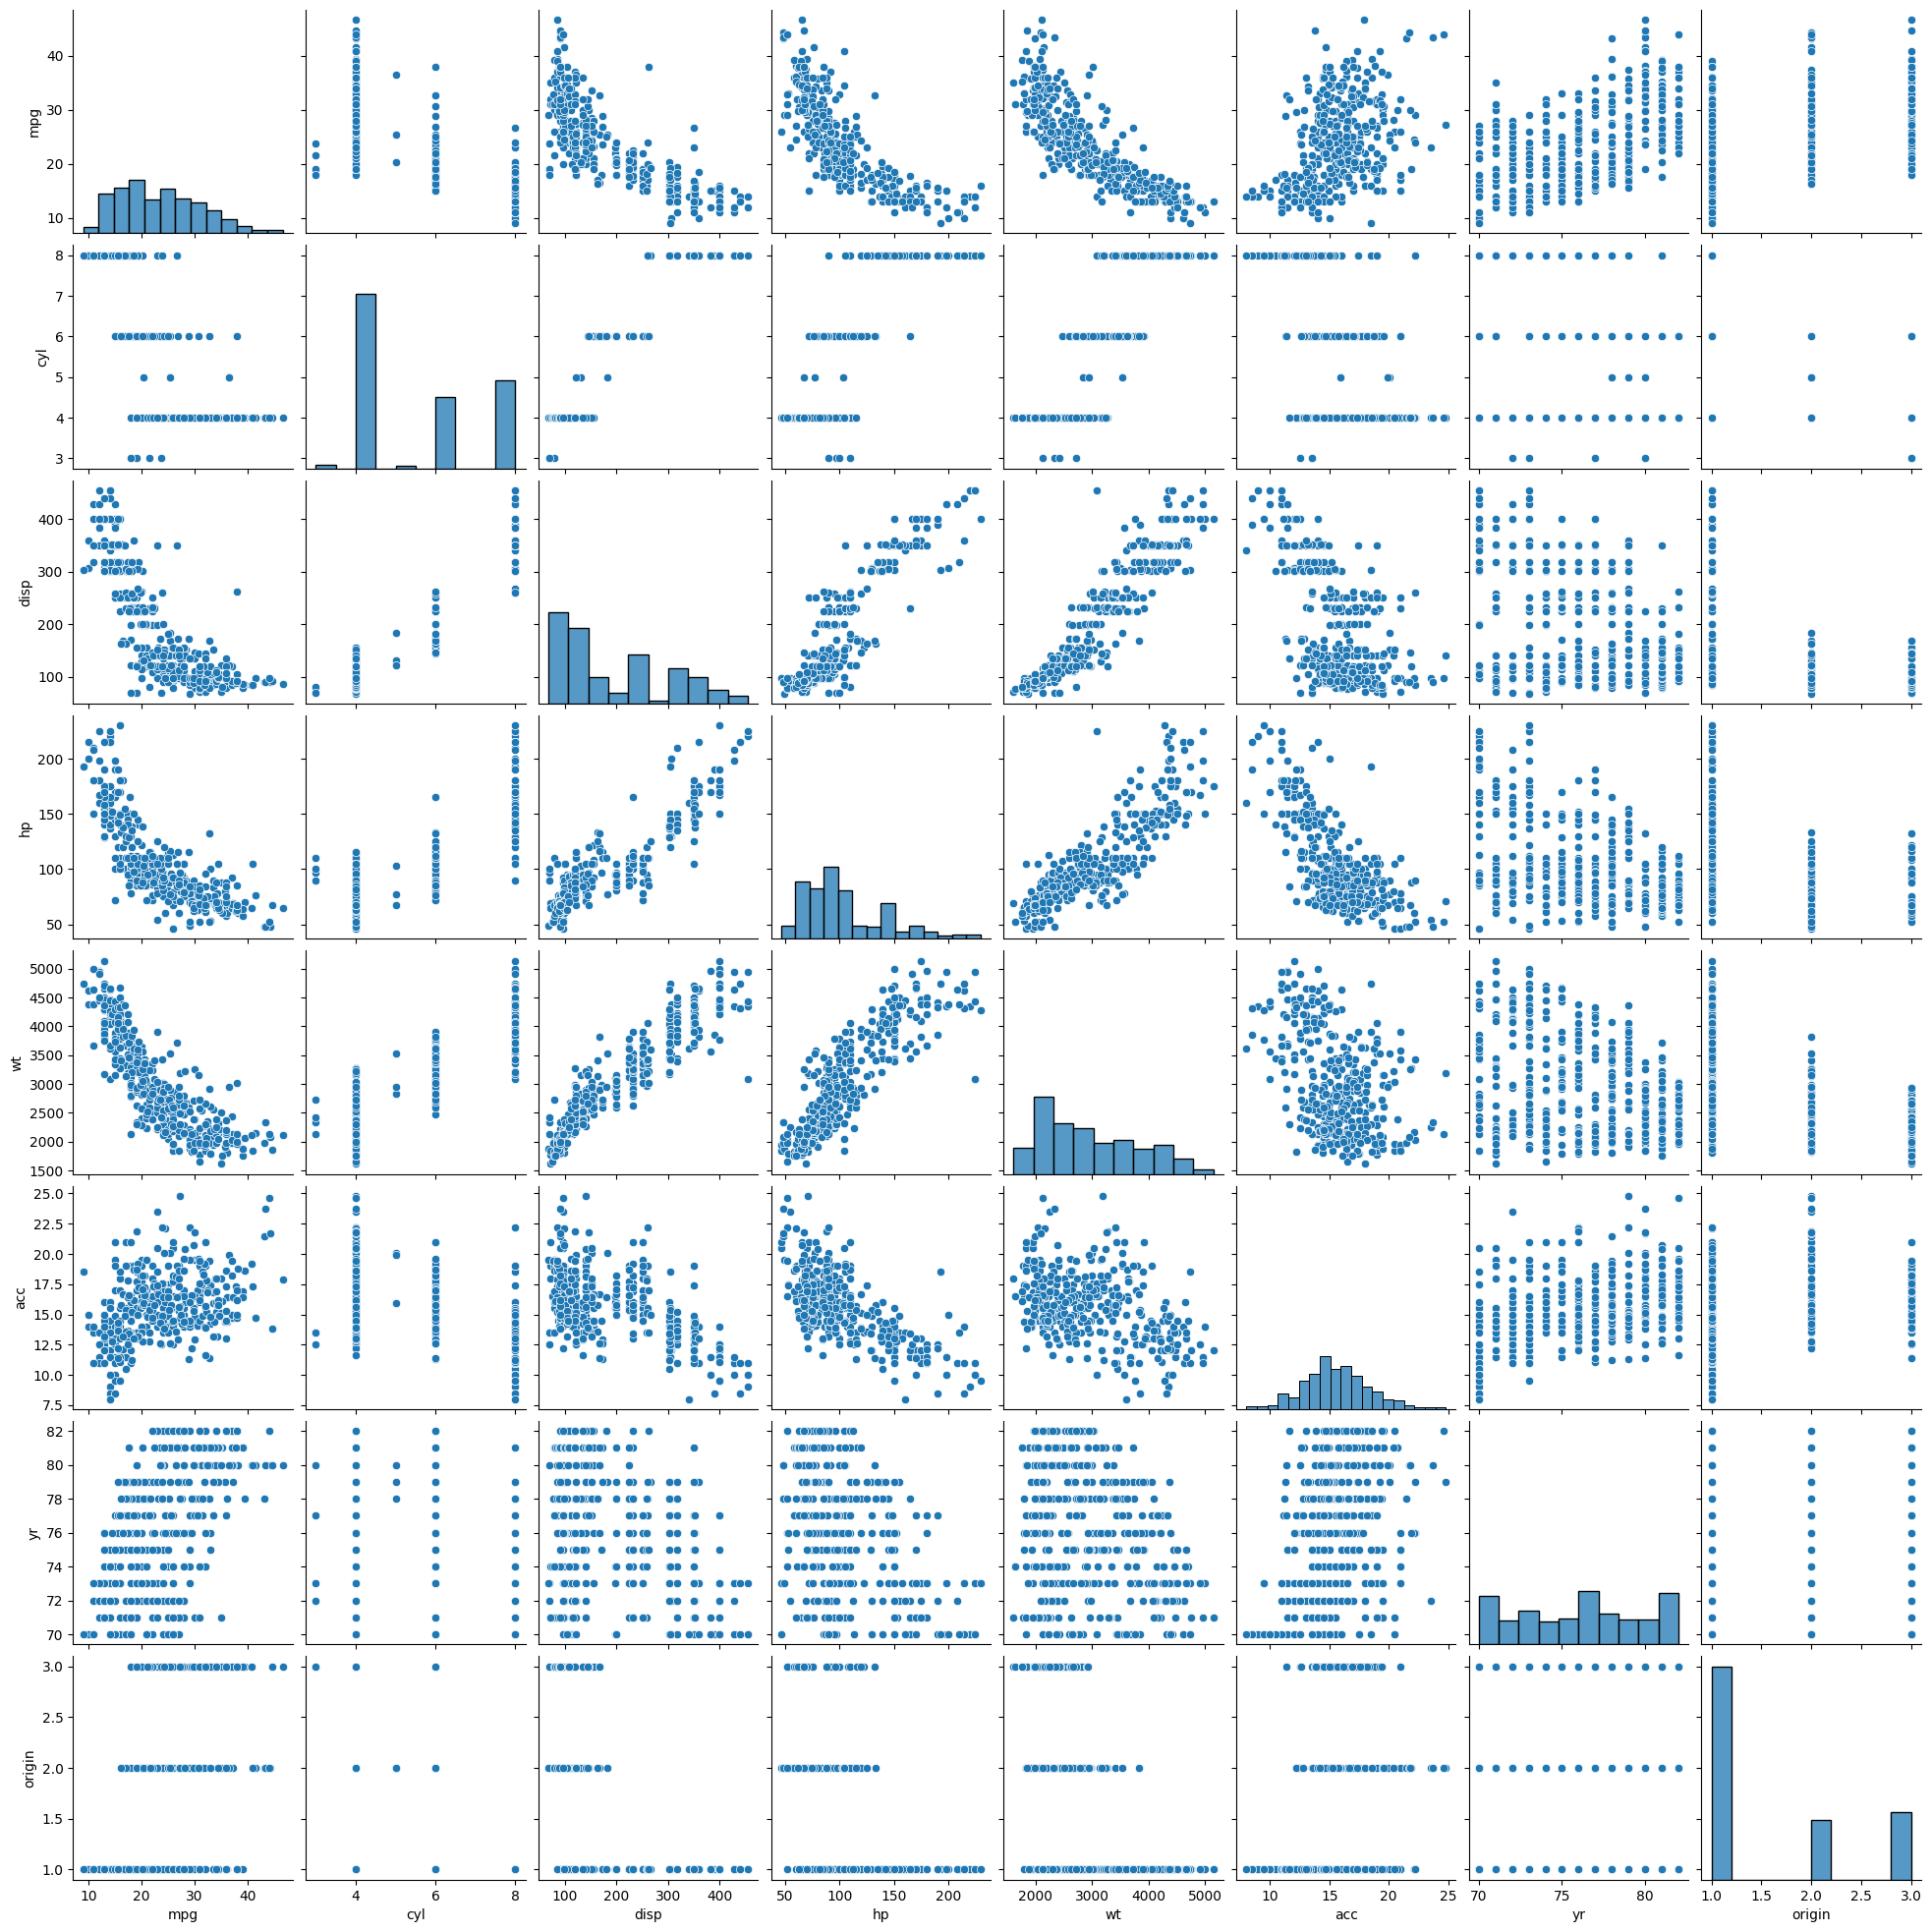

In [130]:
sns.pairplot(data)

**Part 1.2 d - Visualize a scatterplot for ‘wt’ and ‘disp’.
Datapoints should be distinguishable by ‘cyl’.**

<Axes: xlabel='wt', ylabel='disp'>

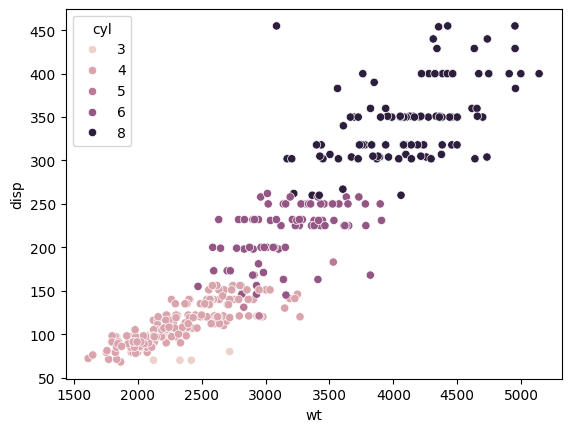

In [131]:
sns.scatterplot(data=data, x='wt', y='disp', hue='cyl')

**Part 1.2 e - Share insights for Q2.d.**

While comparing wt and disp feature
- both are seems to be postively correlated , when weight increases , displacement also increases and vice versa

While comparing wt and disp feature and distinguish by cylinders
- each cylinder form distinct clusters in the data - we have 5 clusters of data
- all three are postively correlated, when cylinders increases both weight and displacement also increased and vice versa



**Part 1.2 f - Visualize a scatterplot for ‘wt’ and ’mpg’.
Datapoints should be distinguishable by ‘cyl’**

<Axes: xlabel='wt', ylabel='mpg'>

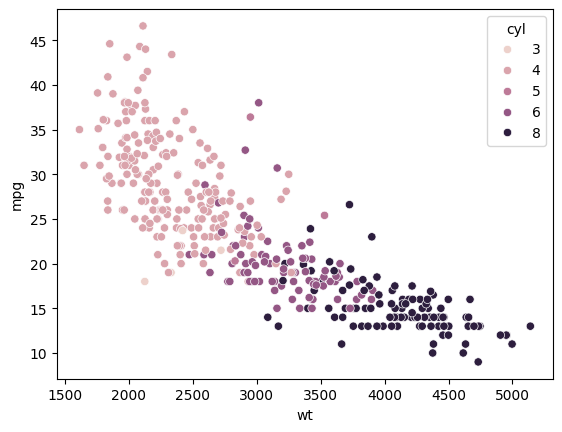

In [132]:
sns.scatterplot(data=data, x='wt', y='mpg', hue='cyl')

**Part 1.2 g- Share insights for Q2.f.**

While comparing wt and mpg feature
- both are seems to be negatively correlated , when weight increases , miles per gallon also decreases and vice versa

While comparing wt and mpg feature and distinguish by cylinders
- each cylinder form distinct clusters in the data -  we have 5 clusters of data

- all three are negatively correlated, when cylinders increases both weight and miles per gallon also decreases and vice versa


**Part 1.2 h - Check for unexpected values in all the
features and datapoints with such values.**

In [133]:
for i in data.columns:
    print(i)
    print(data[i].unique())
    print("------------------------------")


car_name
['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl'
 'dodge challenger se' "plymouth 'cuda 340" 'chevrolet monte carlo'
 'buick estate wagon (sw)' 'toyota corona mark ii' 'plymouth duster'
 'amc hornet' 'ford maverick' 'datsun pl510'
 'volkswagen 1131 deluxe sedan' 'peugeot 504' 'audi 100 ls' 'saab 99e'
 'bmw 2002' 'amc gremlin' 'ford f250' 'chevy c20' 'dodge d200' 'hi 1200d'
 'chevrolet vega 2300' 'toyota corona' 'ford pinto'
 'plymouth satellite custom' 'ford torino 500' 'amc matador'
 'pontiac catalina brougham' 'dodge monaco (sw)'
 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hornet sportabout (sw)' 'chevrolet vega (sw)' 'pontiac firebird'
 'ford mustang' 'mercury capri 2000' 'opel 1900' 'peugeot 304' 'fiat 124b'
 'toyota corolla 1200' 'datsun 1200' 'volkswagen model 111'
 'plymouth cricket' 'toyota corona hardtop' 'd

**I don't see any unexpected values in any features because, I have cleaned Hp columns (replaces "?" with mean ) in Part 1.2a when replaceing nul values (you can refer that)**

**Part 1.3 a - Apply K-Means clustering for 2 to 10
clusters.**

In [134]:
datascaled=data.iloc[:,1:]
datascaled=datascaled.apply(zscore)

In [135]:
datascaled.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.706439,1.498191,1.090604,0.669196,0.630870,-1.295498,-1.627426,-0.715145
1,-1.090751,1.498191,1.503514,1.586599,0.854333,-1.477038,-1.627426,-0.715145
2,-0.706439,1.498191,1.196232,1.193426,0.550470,-1.658577,-1.627426,-0.715145
3,-0.962647,1.498191,1.061796,1.193426,0.546923,-1.295498,-1.627426,-0.715145
4,-0.834543,1.498191,1.042591,0.931311,0.565841,-1.840117,-1.627426,-0.715145


In [136]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(2,11)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(datascaled)
    prediction=model.predict(datascaled)
    meanDistortions.append(sum(np.min(cdist(datascaled, model.cluster_centers_, 'euclidean'), axis=1)) / datascaled.shape[0])


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

**Part 1.3 b - Plot a visual and find elbow point.**

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

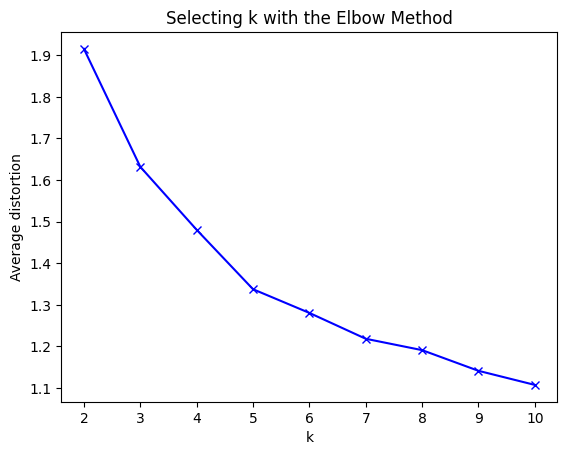

In [137]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

**From the visual ,elbow point seems to be 5** 

**Part 1.3 c - On the above visual, highlight which are
the possible Elbow points.**

**The possible elbow points will be 5 and 7**         

**Part 1.3 d - Train a K-means clustering model once
again on the optimal number of clusters.**

In [138]:
k_means = KMeans(n_clusters = 5)
k_means.fit(datascaled)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [139]:
k_means.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 0, 0, 0, 4, 4, 4, 4,
       4, 4, 0, 2, 2, 2, 2, 4, 4, 4, 4, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 0, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 4, 2, 2, 2, 2, 0, 4, 4,
       4, 4, 4, 0, 4, 2, 2, 4, 4, 4, 4, 2, 4, 4, 2, 0, 0, 0, 0, 1, 4, 1,
       4, 0, 0, 0, 2, 2, 2, 2, 2, 4, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 0, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 4, 3, 0, 3, 4, 4, 4, 0, 4,
       0, 4, 4, 4, 4, 1, 4, 4, 3, 3, 4, 2, 2, 2, 2, 0, 0, 0, 0, 3, 3, 4,
       1, 0, 0, 0, 0, 4, 1, 1, 3, 4, 2, 4, 4, 0, 2, 2, 2, 2, 1, 3, 1, 3,
       1, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 4, 3, 1, 3, 3, 3, 1, 4, 4,
       4, 4, 1, 3, 1, 1, 1, 0, 2, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 2, 3, 1, 1, 3, 4, 3, 3, 1, 4, 0, 4, 0, 1, 1, 0, 0, 3, 0, 0, 0,
       2, 2, 2, 2, 2, 0, 2, 1, 1, 3, 3, 3, 0, 3, 0,

**Part 1.3 e - Add a new feature in the DataFrame which
will have labels based upon cluster value**

In [140]:
prediction=k_means.predict(datascaled)

data["GROUP"] = prediction
datascaled["GROUP"] = prediction
print("Groups Assigned : \n")
data.head()

Groups Assigned : 



,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,2
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,2
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,2
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,2
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,2


In [181]:
data.tail()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1,3
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2,1
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1,3
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,1,3
397,chevy s-10,31.0,4,119.0,82.0,2720,19.4,82,1,3


**Part 1.3 f -Plot a visual and color the datapoints based
upon clusters.**

In [141]:
dataClust = data.select_dtypes(include='number').groupby(['GROUP'])
dataClust.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
GROUP,,,,,,,,
0,19.116250,6.200000,232.387500,101.605867,3291.937500,16.650000,75.662500,1.037500
1,34.137500,4.083333,99.527778,73.179705,2155.819444,16.734722,79.416667,2.763889
2,14.469474,8.000000,349.705263,162.105263,4154.526316,12.604211,73.526316,1.000000
3,28.791045,4.194030,132.567164,83.193116,2563.805970,16.549254,79.671642,1.074627
4,24.619048,4.047619,108.601190,85.803207,2347.619048,16.107143,73.309524,2.107143


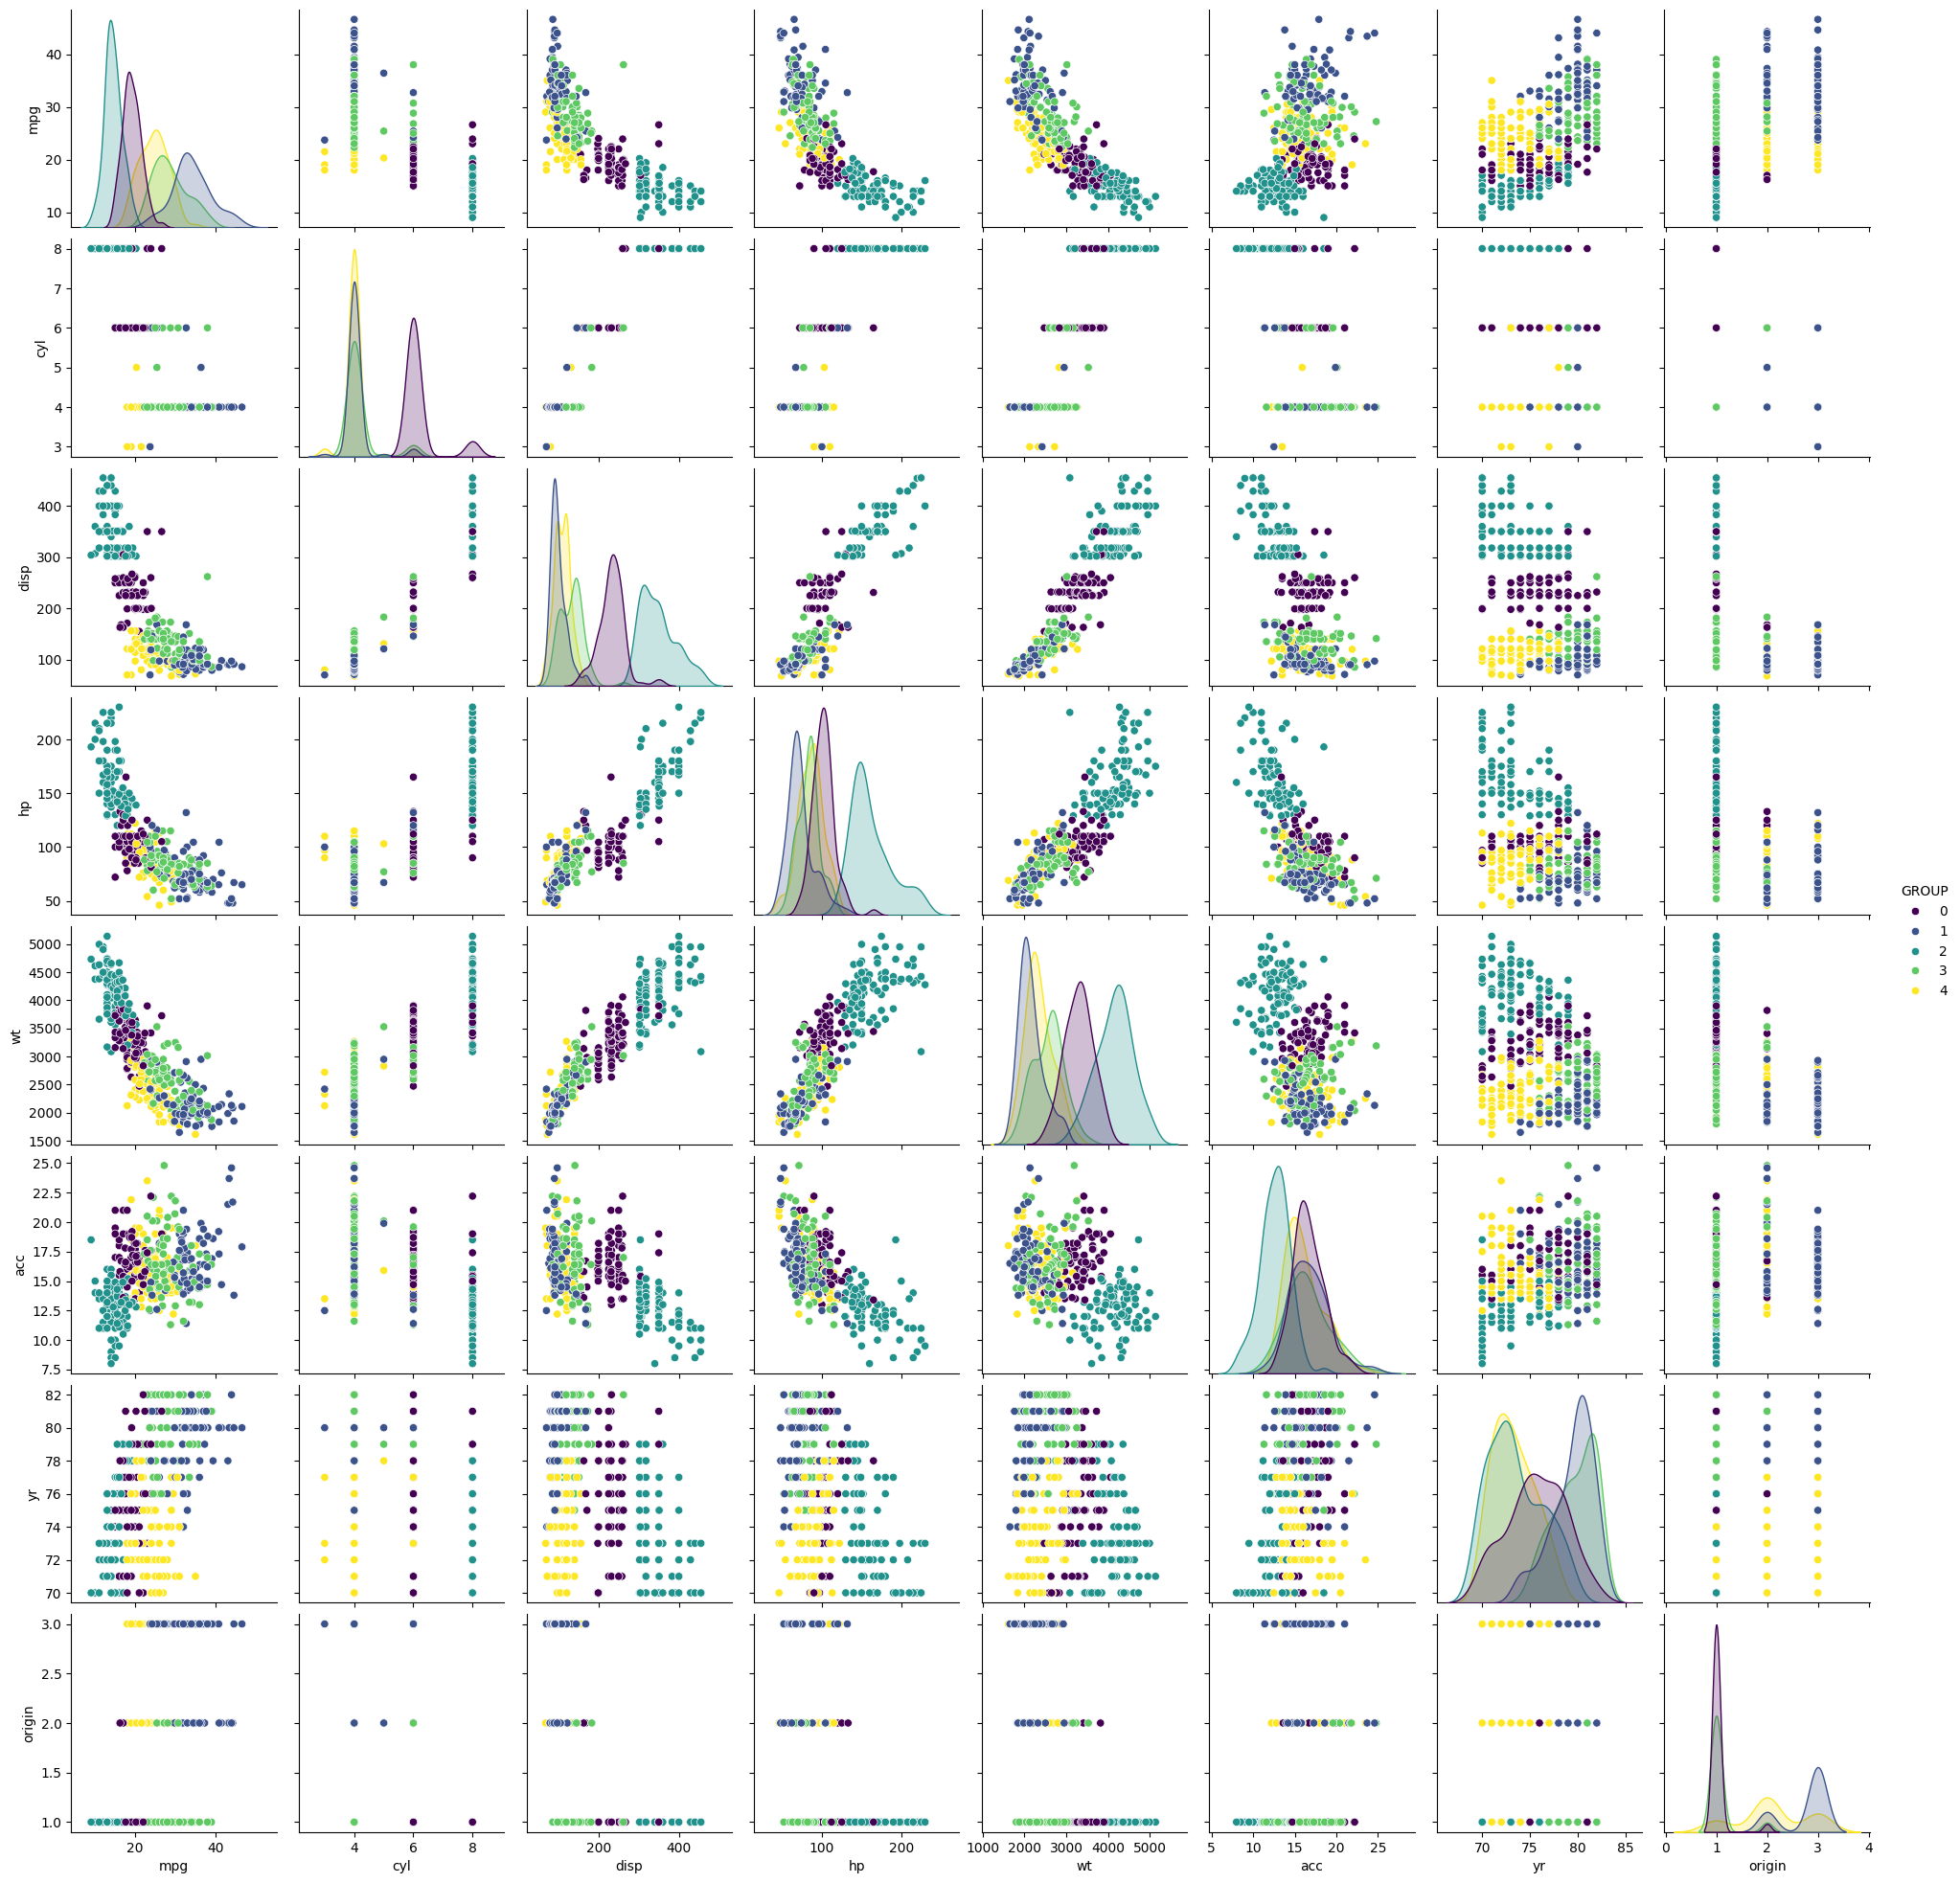

In [142]:
sns.pairplot(data, hue='GROUP',palette='viridis')

**Part 1.3 g - Pass a new DataPoint and predict which
cluster it belongs to.**

In [206]:
# new_data_point = pd.DataFrame([[24.6,4,108,85,2347,16,73,2.1]])
# new_data_point = pd.DataFrame([[29,4,132,83,256,16,79,1]])
new_data_point = pd.DataFrame([[34,4,99,73,2155,16,79,2.7]])


new_data_point

,0,1,2,3,4,5,6,7
0,34,4,99,73,2155,16,79,2.7


In [207]:
scaler = StandardScaler()
scaler.fit(data.iloc[:,1:-1])
new_data_point_scaled = scaler.transform(new_data_point)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [208]:
new_data_point_scaled

array([[ 1.34322489, -0.85632057, -0.90673133, -0.8248604 , -0.96411276,
         0.15681724,  0.80963097,  1.40707872]])

In [209]:
predicted_cluster = k_means.predict(new_data_point_scaled)
print("Predicted Cluster is : " ,predicted_cluster[0])

Predicted Cluster is :  1


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
